In [0]:
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision

In [0]:
#Copying the dataset to colab local disk
!gdown https://drive.google.com/uc?id=1UhqNR7LxsoB9skQuiS30PTqS7NTWceJK

In [0]:
!unzip /content/Pokemon_V3.zip 

**Neural Network Class:**

In [0]:
import torch
import torchvision

torch.set_default_tensor_type('torch.cuda.FloatTensor')
class Network(torch.nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden1 = torch.nn.Linear(24300,128)
    self.relu1 = torch.nn.ReLU()
    
    self.hidden2 = torch.nn.Linear(128,256)
    self.relu2 = torch.nn.ReLU()

    self.hidden3 = torch.nn.Linear(256,512)
    self.relu3 = torch.nn.ReLU()
    
    self.output = torch.nn.Linear(512,5)

  def forward(self, x):
    x = self.hidden1(x)
    x = self.relu1(x)
    x = self.hidden2(x)
    x = self.relu2(x)
    x = self.hidden3(x)
    x = self.relu3(x)
    x = self.output(x)
    return x

**Loading and dividing the dataset into train and test sets:**

In [0]:
data_path = '/content/content/Pokemon_V3'
dataset = torchvision.datasets.ImageFolder(
    root=data_path,
    transform=torchvision.transforms.ToTensor()
)
train_set, test_set = torch.utils.data.random_split(dataset, [1500, 502])

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=16,
    num_workers=0,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=16,
    num_workers=0,
    shuffle=True
)


**Feed-Forward Loop:**

In [12]:
loss_function = torch.nn.CrossEntropyLoss()
model = Network()
model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-6)

epochs = 80

train_accuracy_list = []
test_accuracy_list = []

train_loss_list = []
test_loss_list = []

test_accuracy_max = -1

for i in range(epochs):
  correct = 0
  total = 0
  total_train_loss = 0
  total_test_loss = 0

  for images, labels in train_loader:
    #images.cuda()
    images = images.to('cuda', non_blocking=True)
    images = images.view(images.shape[0], -1)
    
    # Training pass
    optimizer.zero_grad()
    
    output = model.forward(images)
    #output.to(torch.float64)
    _, predicted = torch.max(output.data, 1) # the dimension 1 corresponds to max along the rows
    total += labels.size(0)
    correct += (predicted == labels).sum().item() 
    output.squeeze_(-1)
    loss = loss_function(output, labels)
    loss.backward()
    optimizer.step()
    total_train_loss += loss.item()
  else:
    train_loss = total_train_loss/len(train_loader)
    train_loss_list.append(train_loss)
    train_accuracy = 100 * correct / total
    train_accuracy_list.append(train_accuracy)
    correct_t = 0
    total_t = 0
    with torch.no_grad():
      for data in test_loader:
        images_t, labels_t = data
        images_t = images_t.to('cuda', non_blocking=True)
        images_t = images_t.view(images_t.shape[0], -1)
        output_t = model.forward(images_t)
        _, predicted_t = torch.max(output_t.data, 1)
        total_t += labels_t.size(0)
        correct_t += (predicted_t == labels_t).sum().item()
        output_t.squeeze_(-1)
        loss_t = loss_function(output_t,labels_t)
        total_test_loss += loss_t.item()
    #print("total size:",total_t)   
    test_loss = total_test_loss/len(test_loader)
    test_loss_list.append(test_loss)
    test_accuracy = 100 * correct_t / total_t
    test_accuracy_list.append(test_accuracy)
    print('Epoch %d:\ntrain loss: %.4f'%(i, loss.item()))
    print('test loss: %.4f'%(loss_t.item()))
    print('train_accuracy %.2f' % (train_accuracy))
    print('test_accuracy %.2f' % (test_accuracy))
    if test_accuracy > test_accuracy_max:
      test_accuracy_max = test_accuracy
      print("New Max Test Accuracy Acheived %.2f. Saving model.\n\n"%(test_accuracy_max))
      torch.save(model,'best_test_acc_model.pth')
    else:
      print("Test accuracy did not increase from %.2f\n\n"%(test_accuracy_max))


Epoch 0:
train loss: 1.6577
test loss: 1.6007
train_accuracy 45.33
test_accuracy 47.01
New Max Test Accuracy Acheived 47.01. Saving model.




/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Network. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch 1:
train loss: 0.6809
test loss: 0.7583
train_accuracy 63.73
test_accuracy 61.75
New Max Test Accuracy Acheived 61.75. Saving model.


Epoch 2:
train loss: 0.5208
test loss: 0.4391
train_accuracy 72.53
test_accuracy 67.53
New Max Test Accuracy Acheived 67.53. Saving model.


Epoch 3:
train loss: 0.2492
test loss: 0.3483
train_accuracy 77.93
test_accuracy 76.29
New Max Test Accuracy Acheived 76.29. Saving model.


Epoch 4:
train loss: 0.5978
test loss: 0.5770
train_accuracy 80.87
test_accuracy 79.08
New Max Test Accuracy Acheived 79.08. Saving model.


Epoch 5:
train loss: 0.3069
test loss: 0.4747
train_accuracy 84.33
test_accuracy 80.68
New Max Test Accuracy Acheived 80.68. Saving model.


Epoch 6:
train loss: 0.4678
test loss: 0.3321
train_accuracy 85.47
test_accuracy 74.10
Test accuracy did not increase from 80.68


Epoch 7:
train loss: 0.3117
test loss: 0.5227
train_accuracy 86.93
test_accuracy 72.71
Test accuracy did not increase from 80.68


Epoch 8:
train loss: 0.3082
test 

**Accuracy and Loss Result Graphs:**

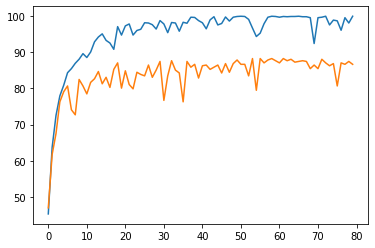

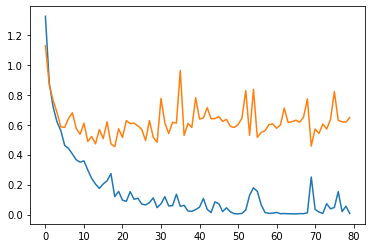

In [13]:
plt.figure()
plt.plot(train_accuracy_list)
plt.plot(test_accuracy_list)

plt.figure()
plt.plot(train_loss_list)
plt.plot(test_loss_list)

**Loading the best saved model:**

In [0]:
best_test_model = torch.load('/content/best_test_acc_model.pth')

**Pokemon Sample Inferences:**

In [0]:
#Copying the Pokemon Sample Folder from the drive into the colab disk
!gdown https://drive.google.com/uc?id=1kiXeBqHdXzu-PYUbmgyrMnzNLc37JpmA

In [0]:
!unzip /content/Pokemon_Samples.zip

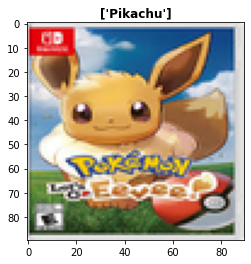

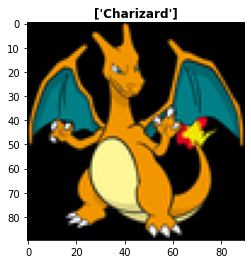

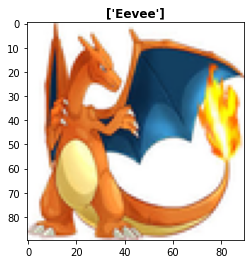

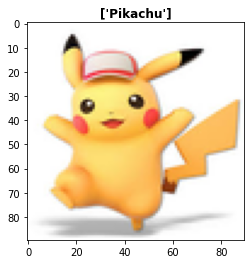

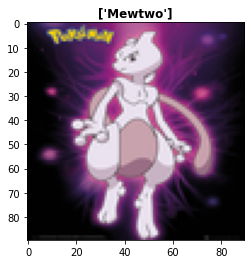

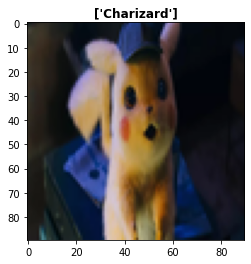

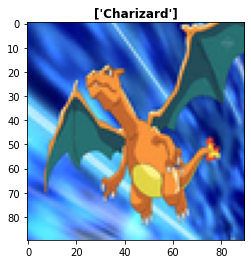

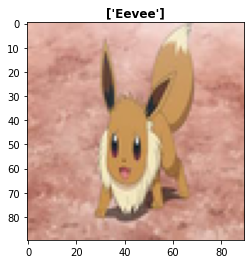

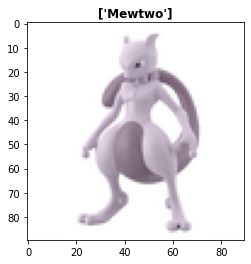

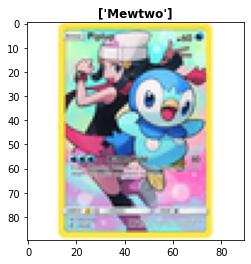

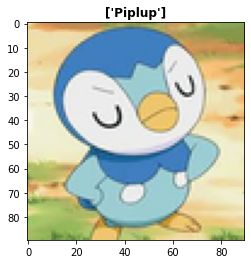

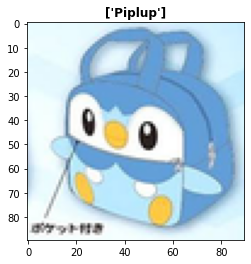

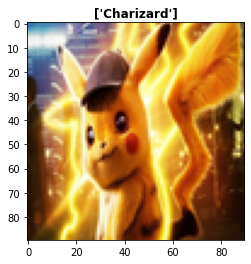

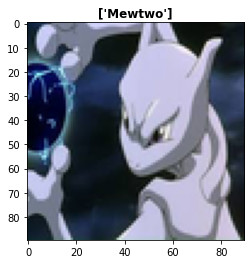

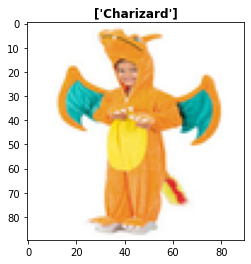

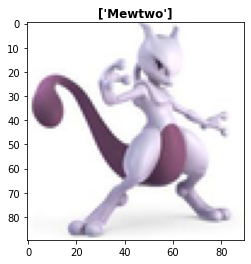

In [22]:
#Loop for loading each image and predict the out for each one
#The title of each image is the inference result of the model
pokemon_samples_path = '/content/content/Pokemon Samples'
for image_path in os.listdir(pokemon_samples_path):
  try:
    im = Image.open(os.path.join(pokemon_samples_path, image_path))
    im = im.convert("RGB")
    im = im.resize((90,90),Image.ANTIALIAS)
    loader = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
    im_tensor = loader(im)
    im_tensor = im_tensor.view(-1)
    im_tensor = im_tensor.cuda()  #assumes that you're using GPU
    output = best_test_model.forward(im_tensor)
    #Get the class-to-index dictionary
    class_to_index_dict = train_loader.sampler.data_source.dataset.class_to_idx
    #Get the predicted class label
    prediction_label = output.argmax()
    plt.figure()
    #Print the title correspinding to the predicted label
    plt.title([k for k,v in class_to_index_dict.items() if v == prediction_label],fontweight="bold")
    plt.imshow(im)
  except IOError:
    pass